In [1]:
#import required modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [2]:
#get mitochondrial genome informations
mtdnas=pd.read_csv('../../data/organelles.csv',index_col=0)
mtdnas=mtdnas.loc[['Mus musculus LP/J','Mus musculus C3H/HeJ','Mus musculus BALB/cJ','Mus musculus A/J',
                  'Mus musculus castaneus CAST/EiJ','Mus musculus NOD/ShiLtJ','Mus musculus domesticus AKR/J',
                  'Mus musculus domesticus WSB/EiJ','Mus musculus DBA/2J','Mus musculus 129S1/SvImJ',
                  'Mus musculus musculus PWK/PhJ','Mus musculus CBA/J','Mus musculus NZO/HiLtJ',
                  'Mus musculus FVB/NJ','Mus musculus C57BL/6NJ','Mus spretus SPRET/EiJ']]
mtdnas=mtdnas[~mtdnas.index.duplicated(keep='first')]
mtdnas.index=pd.Series(mtdnas.index.values).apply(lambda name:name.split(' ')[-1].lower().replace('/',''))

In [12]:
def add_label(subdf):
    global indicer
    subdf['label']=len(subdf)*[indicer]
    indicer+=1
    
indicer=0
dfs.apply(add_label)

Mus_musculus_lpj           None
Mus_musculus_c3hhej        None
Mus_musculus_balbcj        None
Mus_musculus_aj            None
Mus_musculus_casteij       None
Mus_musculus_nodshiltj     None
Mus_musculus_akrj          None
Mus_musculus_wsbeij        None
Mus_musculus_dba2j         None
Mus_musculus_129s1svimj    None
Mus_musculus_pwkphj        None
Mus_musculus               None
Mus_musculus_cbaj          None
Mus_musculus_fvbnj         None
Mus_musculus_c57bl6nj      None
Mus_musculus_nzohiltj      None
Mus_musculus_spreteij      None
dtype: object

In [24]:
df=pd.concat(dfs.tolist())
df.head(n=3)

,score,eg2_value,e_value,g_id,g_start,mt_start,g_length,mt_length,g_strand,mt_strand,g_size,g_sequence,mt_sequence,label
0,2464,0.0,0.0,4,79861757,12489,2871,2869,+,+,160599618,AAGTACAATAGTAGTTGCAGGAATCTTTCTACTGGTCCGATTTCAC...,AAGTACAATAGTAGTTGCAGGAATTTTCCTACTGGTCCGATTCCAC...,0
1,719,0.0,0.0,5,85796228,4846,1591,1594,+,+,158326599,AAAATAATTACCCACCACACATGCTTCAAAAATAACTTTATCCTTc...,AAAataataactcaCCAAACAAAAACTAAACCCAACCTAATATTTT...,0
2,695,0.0,0.0,4,6615132,3198,1326,1316,+,+,160599618,TTATATCAGTCCTATTAATAAGCAGGTCACTTTCTCTACAAATATG...,TTTTATCAGTTCTATTAATAAATGGATCCTACTCTCTACAAACACT...,0


In [25]:
df['g_GC']=df['g_sequence'].apply(lambda seq:(seq.count('G')+seq.count('C'))/len(seq))
df.head(n=3)

,score,eg2_value,e_value,g_id,g_start,mt_start,g_length,mt_length,g_strand,mt_strand,g_size,g_sequence,mt_sequence,label,g_GC
0,2464,0.0,0.0,4,79861757,12489,2871,2869,+,+,160599618,AAGTACAATAGTAGTTGCAGGAATCTTTCTACTGGTCCGATTTCAC...,AAGTACAATAGTAGTTGCAGGAATTTTCCTACTGGTCCGATTCCAC...,0,0.358412
1,719,0.0,0.0,5,85796228,4846,1591,1594,+,+,158326599,AAAATAATTACCCACCACACATGCTTCAAAAATAACTTTATCCTTc...,AAAataataactcaCCAAACAAAAACTAAACCCAACCTAATATTTT...,0,0.313653
2,695,0.0,0.0,4,6615132,3198,1326,1316,+,+,160599618,TTATATCAGTCCTATTAATAAGCAGGTCACTTTCTCTACAAATATG...,TTTTATCAGTTCTATTAATAAATGGATCCTACTCTCTACAAACACT...,0,0.312828


In [28]:
X=df[['g_start','g_length','g_size','g_GC']]
y=df['label']

/var/folders/g2/9pvgl5793mxgz8dg4mhwym0m0000gn/T/ipykernel_1932/2936358144.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['x']=X_tsne[:,0]
/var/folders/g2/9pvgl5793mxgz8dg4mhwym0m0000gn/T/ipykernel_1932/2936358144.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['y']=X_tsne[:,1]
/var/folders/g2/9pvgl5793mxgz8dg4mhwym0m0000gn/T/ipykernel_1932/2936358144.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

<AxesSubplot:xlabel='x', ylabel='y'>

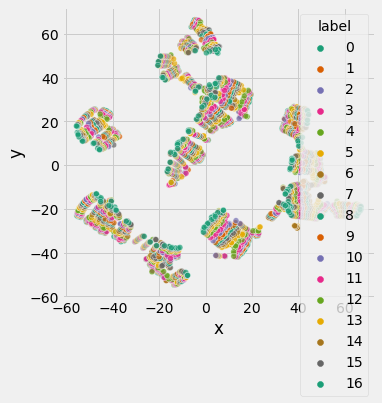

In [51]:
plt.style.use('fivethirtyeight')
X_normalized=StandardScaler().fit(X).transform(X)
tsne = TSNE(random_state = 0,perplexity=40)
X_tsne = tsne.fit_transform(X_normalized)
X['x']=X_tsne[:,0]
X['y']=X_tsne[:,1]
X['label']=y
fig,axs=plt.subplots(1,1,figsize=(5,5))
sns.scatterplot(
    x='x',
    y='y',
    hue='label',
    data=X,
    palette='Dark2',
    alpha=.7,
    ax=axs
)